In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from util.util import load_data_1D, get_2_class_data_1D, get_2_class_data_2D, get_cancer, plot_hist_1D, kernel_plot

# Probability density estimation

In this exercise you are going to learn and apply nonparametric probability density estimation techniques.
You will apply an histogram-based approach as well as a kernel density estimator.

But first you need to load a Data set as 1-dimensional vector with the function ***load_Data_1D()***. 
At this point, we do not have any information about the underlying distribution model.

## exercise 1: Histogram

So to get a first glance, we use simple histograms to represent the distribution of the given dataset.
The **binwidth** $\Delta_i$ determines the width of a bin and the number of observations falling into the 
corresponding bin is given by $n_i$. Hence, the probability for each bin is given by:

$p_i=\dfrac{n_i}{N\Delta_i}$

where $N$ is the total number of samples. It can be easily verified that the condition :$\int p(x)dx=1$ holds.


1. Visualize the distribution of the given dataset using **plot_hist_1D(X,binwidth)** to create a one-dimensional histogram. 
2. What can you say about the distribution of the data? What do you observe, when changing the binwidth parameter?


Load the data

In [2]:
################################
#        YOUR CODE HERE        #
################################
x = load_data_1D()

Plot the histogram (**binwidth = 0.01**)

/home/holosynskyi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


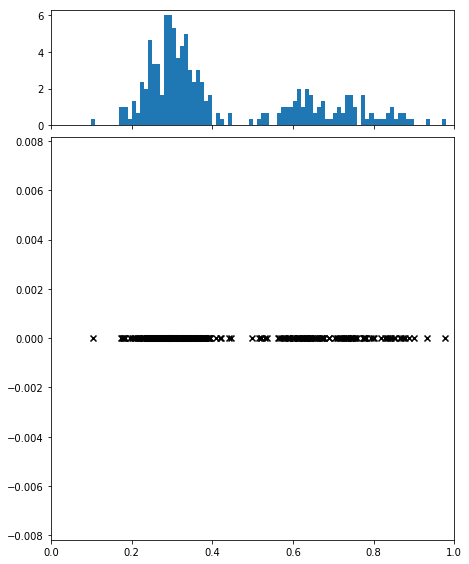

In [3]:
################################
#        YOUR CODE HERE        #
################################
plot_hist_1D(x,0.01) 

Plot the histogram (**binwidth = 0.05**)

/home/holosynskyi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


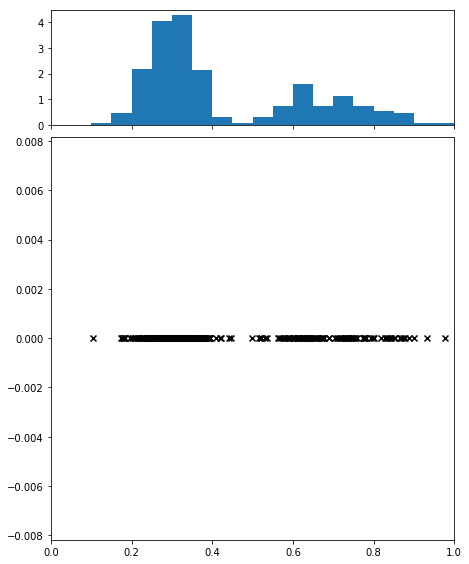

In [4]:
################################
#        YOUR CODE HERE        #
################################
plot_hist_1D(x,0.05) 

Plot the histogram (**binwidth = 0.03**)

/home/holosynskyi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


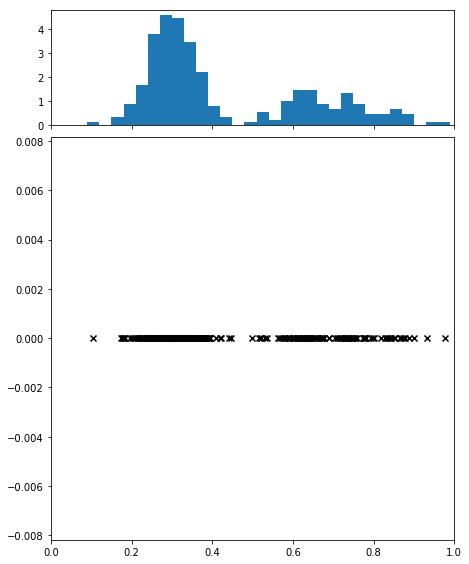

In [5]:
################################
#        YOUR CODE HERE        #
################################
plot_hist_1D(x,0.03) 

 What can you say about the distribution of the data? What do you observe, when changing the binwidth parameter?

In [6]:
################################
#       YOUR ANSWER HERE       #
################################

We see 2 normal-distributed classes. Histogram approach can be used to density estimation

- For a very small Value of the binwidth -> density model spiky
- For a big value of binwidth -> density model too smooth

## exercise 2: Kernel density estimators

In this exercise, you are going to replace the histogram-based approach by a kernel density estimator, namely the Parzen-Window estimator.

The Kernel density estimators uses a Kernel-Function which defines the neighborhood of a given sample point. Here, we consider the Parzen-Window function around a sample $\mathbf{x}$ is defined as follows:

$k(\mathbf{u})=\begin{cases}
1, & |u_i| \leq 1/2, & i=1,.....D\\
0, & otherwise \end{cases}$

where $\mathbf{u} = (\mathbf{x} -\mathbf{x_n})\ /\ h$, \mathbf{x_n} another sample point, and $h$ is the bandwidth parameter.
This function represents a hypercube with origin at a given sample point. The function assigns a value $1$ to a sample point if it lies within 1/2 of the edges of the hypercube, and 0 if lies outside (note that the evaluation is done for all dimensions of the sample point).

The number of Data points lying inside this cube is given as:

$K=\sum^{N}_{n=1}k\left(\dfrac{x-x_n}{h}\right)$

The estimated density by the Parzen-window estimator at a given sample point is given by the following expression.

$p(x)=\dfrac{1}{N}\sum^{N}_{n=1}\dfrac{1}{h^D}k\left(\dfrac{x-x_n}{h}\right)$

Use the one-dimensional data vector from the exercise before.
1. Implement a function of the parzen-window to estimate the density distribution the given Data. This function takes the Parameters x, c: given data set and h: side of the hypercube.
Plot your results for the stimated density px with the following function **kernel_plot(px)**


In [7]:
def parzen_window(x, y, h=1):
    """ 
        Method implements the parzen window kernel funtion. 
    
        x : np.ndarray 
            Vector origin x.
            
        y : np.ndarray 
            Other vector y.
        
        h : float
            Bandwidth parameter.
    """
    ################################
    #        YOUR CODE HERE        #
    ################################
    return sum([np.abs(a1)<=0.5 for a1 in (x-y)/h]) == len(x)


In [8]:
def prz_window_est(x_samples, x, h, kernel_func):
    """ 
        Method implements the Parzen window estimation procedure.
    
        x_samples : np.ndarray 
            Set of points containing the training data from which to derive the Parzen window density estimate.
            
        x: np.ndarray
            Point/ vector for which to evaluate the sample based density function.
            
        h: float
            Bandwidth parameter.
            
        kernel_func: function
            Reference to kernel function to be used for density estimation.
        
    """
    ################################
    #        YOUR CODE HERE        #
    ################################
    D=len(x)
    N=len(x_samples)
    return sum([kernel_func(x1, x, h) for x1 in x_samples])/(N*(h**D)) 

Evaluate the Parzen window estimation.

In [9]:
x = np.array([0,0.3,0.6,1]).reshape((-1,1))
print(x)

c = np.array([0.5])
print(prz_window_est(x, c, 0.4, parzen_window))

[[0. ]
 [0.3]
 [0.6]
 [1. ]]
1.25


In [10]:
# points to used for density evaluation 

x_samples = np.hstack(
    (
        np.random.normal(size=700,loc=0.3,scale=0.05), 
        np.random.normal(size=300,loc=0.7,scale=0.1)
    )
).reshape((-1, 1))  

        # no labels
x = np.linspace(0,1,1000).reshape((-1,1))

h = 0.15
density = np.array([prz_window_est(x_samples, x1, h, parzen_window) for x1 in x])


Plot the density estimated by the Parzen window approach using the **kernel_plot** method.

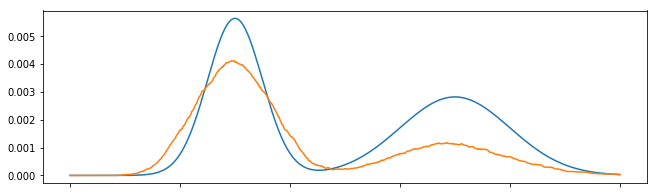

In [11]:
################################
#        YOUR CODE HERE        #
################################
kernel_plot(density)

Try different bandwidth parameter values. What can you observe?

In [12]:
################################
#        YOUR CODE HERE        #
################################

The parzen-window suffers usually from the same binning effects as the histogram method suffered from. 
We can obtain a smoother density estimate if we choose a smoother density function.

A common choice is the Gaussian kernel:

$p(x)=\dfrac{1}{N}\sum^{N}_{n=1}\dfrac{1}{(2\pi h^2)^{\frac{1}{2}}}exp\left(-\dfrac{||x-x_n||^2}{2 h^2}\right)$


Implement a the Gaussian kernel function and again plot your new density estimate.

In [13]:
np.sqrt((np.array([2])-np.array([11]))**2)
np.exp(2)

7.38905609893065

In [14]:
def norm(a, b):
    return np.sqrt(np.sum((a - b)**2))

        
def gauss(h, x, y):
    e = np.exp(norm(x, y)/(2*h*h))
    return 1/(e*np.sqrt(2*np.pi*h*h))

def gaussian_kernel(x, xn, h):
    """ 
        Method implements the Gaussian kernel funtion. 
    
        u : np.ndarray 
            Vector from origin point x (point of density evaluation) to other data point x_n.
    """
    ################################
    #        YOUR CODE HERE        #
    ################################
    N = len(xn)
    
    return sum([gauss(h, x, x1) for x1 in xn])/N

Plot the estimated probability density using the **kernel_plot** method.

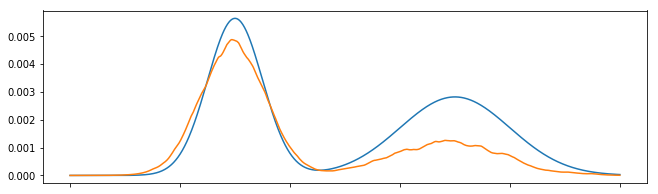

In [15]:
################################
#        YOUR CODE HERE        #
################################

h = 0.1
x_samples = np.hstack(
    (
        np.random.normal(size=700,loc=0.3,scale=0.05), 
        np.random.normal(size=300,loc=0.7,scale=0.1)
    )
).reshape((-1, 1))  
density = np.array([gaussian_kernel(x1, x_samples, h) for x1 in x])

kernel_plot(density)

Try different bandwidth parameter values. What can you observe?

# exercise 3: Nearest-neighbor methods

In this exercise you are going to apply the k-nearest-neighbor technique for solving a classifcation problem.

In contrary to the Parzen-window based approach for density estimation, the k-nearest neighbor method has 
no fixed bandwidth parameter governing the size of kernels influence. Instead the k-nearest neighbor approach 
consideres the $k$ nearest neighbors. It can be used for density estimation as well as classification and regression.
   
For classification, the $k$ nearest neightbors's class labels are considered for classification.

Load the data consisting of a two dimensional feature vector and class labels

In [16]:
################################
#        YOUR CODE HERE        #
################################
X, y = get_2_class_data_2D() 


Inspect the data, i.e., plot it using a scatter plot.

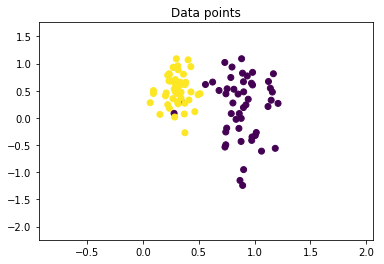

In [17]:
h = 1.0  # step size in the mesh
 
# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In the following, we want to implement the k-nearest neighbor method to solve the given classification problem.
Therefore, we need a measure of distance. The euclidean distance is a natural measure to measure 
the distance between two vectors.

The euclidean distance of two vectors **u**, **v** is given by: $\sqrt(\sum_d^{D} (u_d - v_d)^2)$.

Implement the euclidean distance **euc** method.

In [18]:
def euc(u, v):
    return norm(u,v)
    ################################
    #        YOUR CODE HERE        #
    ################################

Next implement a k-nearest neighbor classifier to classify a given sample.

1. Calculate the distances to all other samples.
2. Select the k-nearest instances and determine the class by majority voting.

In [19]:
from collections import defaultdict
def knn_classifier(x, X_train, y_train, k, distance_func):
    """
    x : np.ndarray
        Instance to be classified.
        
    X_train: np.ndarray
        Array holding the training sample feature vectors.
    
    y_train: np.ndarray
        Array holding the training sample classes.
        
    k : int
        Number of neighboring instances to consider for classification.
        
    distance_func: method
        Function to be used for distance calculation
    
    """
    ################################
    #        YOUR CODE HERE        #

 
    d = np.array([ distance_func(x, xt) for xt in X_train ])
    
    zipped = zip(d,y_train)
    zipped = sorted(zipped, key=lambda x: x[0])
    first_k = zipped[:k]
    counts = defaultdict(int)
    for _, l in first_k:
        counts[l]+=1
    max_key = next(iter(counts.keys()))
    for key in counts:
        if counts[key]>counts[max_key]:
            max_key = key
    return int(max_key)
        
    

Classify the following instance

In [20]:
test_x = np.array([2, 2])
k = 3
print(knn_classifier(test_x, X, y, k, euc))

0


Plot the classification boundaries using a **meshgrid**.

Note: 
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [21]:
def borders(arr):
    def border(arr):
        pairs = np.stack((arr, np.append(arr[1:],arr[-1])), axis=1)
        #print(pairs_reverse)
        def contour_logic(pair):
            a, b = pair
            return 1 if a>b else 0

        return np.apply_along_axis(contour_logic, 1, pairs)

    return border(arr) + border(arr[::-1])[::-1]

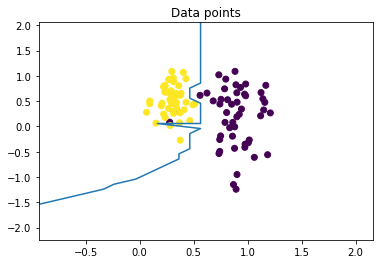

In [22]:
################################
#        YOUR CODE HERE        #
################################   
h=0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#print(xx)
xy = np.dstack((xx,yy))
#print(xy)
labels = np.apply_along_axis(lambda x:knn_classifier(x, X, y, 1, euc), 2, xy)

#print(labels)

borders_matrix = np.apply_along_axis(borders,1,labels)
np.set_printoptions(threshold=np.nan)
#print(borders_matrix)
linexy = xy[np.nonzero(borders_matrix)]

#print(linexy)

#plt.scatter(xx.flatten(), yy.flatten(), c=labels.flatten())
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.plot(linexy[:, 0],linexy[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

# exercise 4: Bayesian Classification

In this exercise you are going to learn about decision theory to determine the optimal decision boundaries.

In the following you are given a dataset consisting of patients which are classified to have either cancer or nor not. Your goal is to derive an decision rule for classifying those patients.

The classes $C0$ and $C1$ contain the one-dimensional input vectors for the classes $C0$ (no cancer) and $C1$ (cancer).

In [23]:
C0, C1 = get_cancer()


Use a scatter plot to visualize the two classes

*Note:* Use the [matplotlib.scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) method.

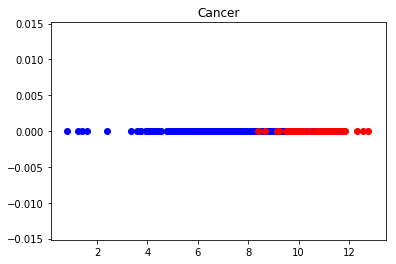

In [24]:
################################
#        YOUR CODE HERE        #
################################   
plt.scatter(C0, np.zeros(len(C0)), color='blue')
plt.scatter(C1, np.zeros(len(C1)), color='red')


plt.title("Cancer")
plt.show()

In [25]:
################################
#        YOUR CODE HERE        #
################################   

Now in order to obtain the optimal decision boundary, which minimizes the probability of making a mistake, we need to solve the inference problem $p\left(\mathbf{x} ,c \right)$. 
Then we choose the class $k$ for which $p \left(\mathbf{x}, C_k \right)$ is maximized.

Given the product law of probability $p \left(\mathbf{x}, C_k \right) = p \left( C_k | \mathbf{x} \right) p \left( \mathbf{x} \right)$ this reduces to deciding for the class $k$ for which the posterior $p \left( C_k | \mathbf{x} \right)$ is maximized.

Using Bayes law and we can decompose this in the computation of $p\left(C_k \right), k \in \left\{ 0 , 1 \right\}$, 
$p \left( \mathbf{x} | C_k \right), k \in \left\{ 0 , 1 \right\}$ and $p \left( \mathbf{x} \right)$ 

1. Write functions to compute $p\left(C_0 \right)$ and $p\left(C_1 \right)$
2. Write functions to compute the class-conditional probabilities $p \left( \mathbf{x} | C_0 \right)$ and $p \left( \mathbf{x} | C_1 \right)$. These are assumed to Gaussian distributed.
3. Write a function to compute $p \left( \mathbf{x} \right)$ 
4. Write functions to compute the posterior class probabilities $p \left( C_0 | \mathbf{x} \right)$ and $p \left( C_1 | \mathbf{x} \right)$. These can be computed using Bayes rule.

In [26]:
################################
#        YOUR CODE HERE        #
################################   
h=.6279688
all_cases = np.append(C0,C1)
def p_C0():
    return len(C0)/(len(C0)+len(C1))

def p_C1():
    return len(C1)/(len(C0)+len(C1))

def p_x_C0(x):    
    return np.vectorize(lambda x: gaussian_kernel(x, C0, h))(x)

def p_x_C1(x):
    return np.vectorize(lambda x: gaussian_kernel(x, C1, h))(x)
    
def p_C0_x(x):
    a = p_x_C0(x)*p_C0()
    b = np.vectorize(lambda x: gaussian_kernel(x, all_cases, h))(x)
    return a/b

def p_C1_x(x):
    a = p_x_C1(x)*p_C1()
    b = np.vectorize(lambda x: gaussian_kernel(x, all_cases, h))(x)
    return a/b


Use the functions above to plot the class-conditional probabilities and the class posterior probabilities.
*Note:* The range for evaluation is $0 \ldots 20$.

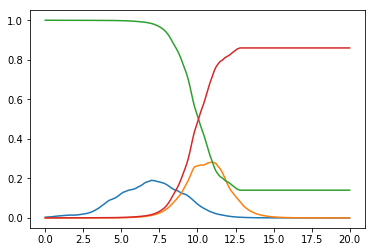

In [27]:
x = np.arange(0,20.1,0.1)
plt.figure()

plt.plot(x,p_x_C0(x))
plt.plot(x,p_x_C1(x))
plt.plot(x,p_C0_x(x))
plt.plot(x,p_C1_x(x))
plt.show()

Write a method which calculates the decision boundary which minimizes the expected number of missclassifications.

In [28]:
################################
#        YOUR CODE HERE        #
################################
difference = np.abs(p_C0_x(x)-p_C1_x(x))

boundary = x[np.argmin(difference)]

Plot your decision boundary and compare it with the class posterior probabilities.

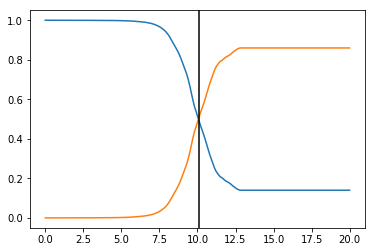

In [29]:
################################
#        YOUR CODE HERE        #
################################   
x = np.arange(0,20.1,0.1)
plt.figure()

plt.plot(x,p_C0_x(x))
plt.plot(x,p_C1_x(x))
plt.axvline(x=boundary, color='black')
plt.show()

In the following we now introduce a loss-matrix, specifying the amount of loss going along with a miss classification. 
We assume that the loss of classifying a patient as having cancer although he is healty is $1$, 
while the loss for classifying a patient as not having cancer although he has cancer is $100$.

Specify the loss matrix.

In [30]:
################################
#        YOUR CODE HERE        #
################################   

$\begin{pmatrix} 0 & 1 \\ 100 & 0 \end{pmatrix}$

The rows
correspond to the true class, whereas the columns correspond to the assignment of class made by our decision criterion.

$\begin{array}{cc}   & Normal & Cancer \\ 
             Normal & 0      &  1 \\
             Cancer & 100    &  0  \end{array}$

Which statistical errors are modeled by the loss?

In [31]:
################################
#       YOUR ANSWER HERE       #
################################

Write methods to calculate the expected loss for classifying an instance $\mathbf{x}$ as $C_0$ and $C_1$.

In [32]:
################################
#        YOUR CODE HERE        #
################################   
def loss_C0(x):
    return p_C0_x(x)*0 + p_C1_x(x)*100

def loss_C1(x):
    return p_C1_x(x)*0 + p_C0_x(x)*1

Plot the expected loss functions in the range $0 \ldots 20$.

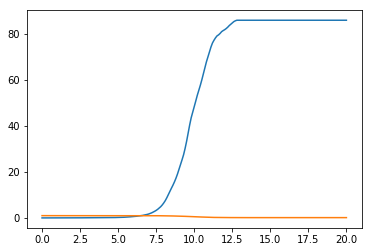

In [33]:
################################
#        YOUR CODE HERE        #
################################   
x = np.arange(0,20.1,0.1)
plt.figure()

plt.plot(x,loss_C0(x))
plt.plot(x,loss_C1(x))
plt.show()

Write a method which calculate the decision boundary which minimizes the expected loss.

In [34]:
################################
#        YOUR CODE HERE        #
################################   
difference = np.abs(loss_C0(x)-loss_C1(x))

boundary_loss = x[np.argmin(difference)]

Plot your decision boundary and compare it with the class posterior probabilities and the previously obtained decision boundary (minimizing the expected miss classifications).

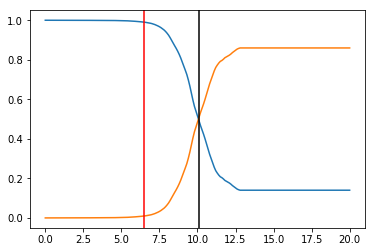

In [35]:
################################
#        YOUR CODE HERE        #
################################   
x = np.arange(0,20.1,0.1)
plt.figure()

plt.plot(x,p_C0_x(x))
plt.plot(x,p_C1_x(x))
plt.axvline(x=boundary, color='black')
plt.axvline(x=boundary_loss, color='red')
plt.show()

# exercise 5: Bayesian k-Nearest Neighbor Classification

Next you are going to combine the Bayesian classification method with the k-nearest neighbor method.

The class posterior probabilities are derived by Bayes' law.

$p \left( C_k | x \right) = \frac{p \left( x | C_k \right) p \left( C_k \right)}{p \left(x \right)} = \frac{K_k}{K}$

We asign a test point $x$ to the class having the largest posterior probability, corresponding to
the largest value of $K_k/K$, i.e., where $K_k$ corresponds to the number of neighbors having class $C_k$.


Apply the k-nearest neighbor classifier to the cancer dataset. 
Therefore, extend the k-nearest neighbor classifier to return class posterior probabilities.
Subsequently, combine the class posterior probabilities with the given loss from exercise 4. 
Display the decision boundaries graphically.

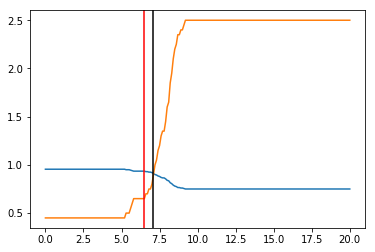

In [56]:
################################
#        YOUR CODE HERE        #
################################   

from collections import defaultdict
def knn_classifier_bayes(x, X_train, y_train, k, distance_func):
    """
    x : np.ndarray
        Instance to be classified.
        
    X_train: np.ndarray
        Array holding the training sample feature vectors.
    
    y_train: np.ndarray
        Array holding the training sample classes.
        
    k : int
        Number of neighboring instances to consider for classification.
        
    distance_func: method
        Function to be used for distance calculation
    
    """
    ################################
    #        YOUR CODE HERE        #

 
    d = np.array([ distance_func(x, xt) for xt in X_train ])
    
    zipped = zip(d, y_train)
    zipped = sorted(zipped, key=lambda x: x[0])
    
        
    first_k = zipped[:k]
    first_counts = defaultdict(int)
    
    for _, l in first_k:
        first_counts[l]+=1
    
    for l in first_counts:
        first_counts[l]/=k
    
    res = np.zeros(len(set(y_train)))
    
    for key in sorted(first_counts):
        res[int(key)] = first_counts[key]

  
    return res



def wtfunction(k, penalty):
    labeled = np.concatenate( ( np.stack((C0, np.zeros(len(C0))), axis=1) , np.stack((C1, np.ones(len(C1))), axis=1) ) , axis = 0 )

    x = np.arange(0,20.1,0.1)
    proba = np.array([ knn_classifier_bayes(x1, labeled[:, 0], labeled[:, 1], k, norm) for x1 in x ])

    loss_knn_C0 = proba[:, 0]
    loss_knn_C1 = proba[:, 1]*penalty
    difference = np.abs(loss_knn_C0-loss_knn_C1)
    return loss_knn_C0, loss_knn_C1, x[np.argmin(difference)]



plt.figure()
loss_knn_C0, loss_knn_C1, boundary_knn_loss = wtfunction(200, 10)
plt.plot(x, loss_knn_C0)
plt.plot(x, loss_knn_C1)

plt.axvline(x=boundary_knn_loss, color='black')
plt.axvline(x=boundary_loss, color='red')
plt.show()



        